# Building the deferred waterfall from the forecast

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import pickle

input_df_dict_long = {'model_dict': model_dict,
                 'billings':df_billings, 
                 'ADBE_cal':df_cal,
                 'bookings': df_bookings,
                 'FX_forwards': df_FX_fwds,
                 'FX_rates': df_FX_rates,
                 'forecast': df_fcst,
                 'final': df
                }

In [122]:
saved_dict = pickle.load( open('../data/processed/final_forecast.p', 'rb'))

In [123]:
saved_dict.keys()

dict_keys(['model_dict', 'ADBE_cal', 'bookings', 'FX_forwards', 'FX_rates', 'final', 'billings', 'forecast', 'initial_waterfall'])

In [124]:
df_waterfall = saved_dict['initial_waterfall']

In [125]:
df_waterfall.head(10)

,As Performed / Upon Acceptance,P01,P02,P03,P04,P05,P06,P07,P08,P09,...,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26
External Reporting BU,,,,,,,,,,,,,,,,,,,,,
Digital Experience,5.072172e+06,1.664945e+08,1.664945e+08,1.017679e+08,1.017679e+08,1.017679e+08,5.794085e+07,5.794085e+07,5.794085e+07,1.712937e+07,...,3.813405e+06,1162279.85,1162279.85,1162279.85,8.226450e+05,8.226450e+05,8.226450e+05,1.672184e+06,1.672184e+06,1.672184e+06
Digital Media,5.601745e+06,3.506325e+08,3.506325e+08,2.191780e+08,2.191780e+08,2.191780e+08,1.279252e+08,1.279252e+08,1.279252e+08,4.023382e+07,...,2.773333e+06,1807709.00,1807709.00,1807709.00,1.288270e+06,1.288270e+06,1.288270e+06,2.164146e+07,2.164146e+07,2.164146e+07
Grand inclusive of Magento/Marketo,1.067392e+07,5.274594e+08,5.274594e+08,3.275887e+08,3.275887e+08,3.275887e+08,1.897708e+08,1.897708e+08,1.897708e+08,5.914232e+07,...,6.856067e+06,3085663.85,3085663.85,3085663.85,2.155525e+06,2.155525e+06,2.155525e+06,2.335949e+07,2.335949e+07,2.335949e+07
Publishing,0.000000e+00,1.033243e+07,1.033243e+07,6.642776e+06,6.642776e+06,6.642776e+06,3.904775e+06,3.904775e+06,3.904775e+06,1.779139e+06,...,2.693293e+05,115675.00,115675.00,115675.00,4.461067e+04,4.461067e+04,4.461067e+04,4.584667e+04,4.584667e+04,4.584667e+04


In [126]:
df_fcst = saved_dict['forecast']

In [127]:
df_fcst.head(10)

,BU,curr,period,recognized_DC,service_DC,deferred_B_DC,deferred_1M_DC,deferred_3M_DC,deferred_6M_DC,deferred_1Y_DC,...,deferred_B_US,deferred_1M_US,deferred_3M_US,deferred_6M_US,deferred_1Y_US,deferred_2Y_US,deferred_3Y_US,book_1Y_DC,book_1Y_US,is_forecast
0,Creative,ARS,2020-07,6786.00,0.0,0.0,2.269996e+07,0.0,0.0,953875.89,...,0.0,311501.652502,0.0,0.0,13089.625145,0.0,0.0,0.0,0.0,1
1,Creative,ARS,2020-08,16472.00,0.0,0.0,2.408421e+07,0.0,0.0,963180.00,...,0.0,313752.445463,0.0,0.0,12547.641949,0.0,0.0,0.0,0.0,1
2,Creative,ARS,2020-09,19205.00,0.0,0.0,3.183559e+07,0.0,0.0,2263704.00,...,0.0,394732.702698,0.0,0.0,28067.897484,0.0,0.0,0.0,0.0,1
3,Creative,ARS,2020-10,30382.19,0.0,0.0,2.685273e+07,0.0,0.0,1318346.81,...,0.0,318570.748470,0.0,0.0,15640.375602,0.0,0.0,0.0,0.0,1
4,Creative,ARS,2020-11,59049.00,0.0,0.0,2.823698e+07,0.0,0.0,1494162.20,...,0.0,321124.778261,0.0,0.0,16992.342903,0.0,0.0,0.0,0.0,1
5,Creative,ARS,2020-12,71355.57,0.0,0.0,3.702655e+07,0.0,0.0,3154860.03,...,0.0,404344.684323,0.0,0.0,34452.328693,0.0,0.0,0.0,0.0,1
6,Creative,ARS,2021-01,79224.95,0.0,0.0,3.875687e+07,0.0,0.0,916705.92,...,0.0,404800.955688,0.0,0.0,9574.648808,0.0,0.0,0.0,0.0,1
7,Creative,ARS,2021-02,36596.00,0.0,0.0,3.238975e+07,0.0,0.0,1337025.94,...,0.0,324175.303733,0.0,0.0,13381.725308,0.0,0.0,0.0,0.0,1
8,Creative,ARS,2021-03,49107.00,0.0,0.0,4.221751e+07,0.0,0.0,2611544.83,...,0.0,405603.786576,0.0,0.0,25090.356687,0.0,0.0,0.0,0.0,1
9,Creative,ARS,2021-04,67878.00,0.0,0.0,3.515827e+07,0.0,0.0,3017041.60,...,0.0,328395.235993,0.0,0.0,28180.628770,0.0,0.0,0.0,0.0,1


# NEED TO DECIDE IF I WANT TO CREATE THE ENTIRE HISTORY OF THE WATERFALL OR NOT

As a check, I should build it historically

- rows are dates, columns are future amounts expected to be amortized
- by currency, BU

Columns
 - total
 - p_1
 - p_2
 - p_3 (etc out 36 months)
 
 - We are taking the USD equivalent and splitting this into the other areas
 
##### Monthly Billings
- 1/2 of the current month + 1/2 of the prior month

##### Annual Billings
- 1/12 of the current annual billings + 11 of the last annual billings + 1/12 of the year prior billings

#### Quarterly

# NOTE: I am ignoring Deferred Type B (Service) billings - for now


In [8]:
# The index is not necessary to create this dataframe

In [128]:
def find_unique_curr_and_BU(df_billings):
    v_BU = df_billings['BU'].copy()
    v_curr = df_billings['curr'].copy()
    v_both = v_BU + v_curr
    v_unique = v_both.unique()

    v_un_BU = [sub[:-3] for sub in v_unique]
    v_un_curr = [sub[-3:] for sub in v_unique]

    return v_un_BU, v_un_curr

### Deferred Revenue Assumptions

##### Monthly Deferred Billings
These occur in the middle of the month. Half the billings go directly to revenue, the remainder amortize out of deferred the next month

##### Three Month Deferred Billings
These are assumed to occur at the end of the period. 

In [129]:
def build_deferred_waterfall(df_billings):
    
    #Finding the unique currencies and BUs to slice the dataframe and build a waterfall for each
    v_un_BU, v_un_curr = find_unique_curr_and_BU(df_billings)
    
    # creating the waterfall list of numeric columns
    wf_columns = ['Total']
    for i in np.arange(36):
        this_column = 'p_'+ str(i+1)
        wf_columns.append(this_column)

    # creating the loop for the individual BU/curr waterfalls
    for i in range(len(v_un_BU)):
        this_BU = v_un_BU[i]
        this_curr = v_un_curr[i]
        
        print('working on BU: {0}  and currency: {1}'.format(this_BU, this_curr))
        this_slice = df_billings[(df_billings['BU']==this_BU) &
                                (df_billings['curr']== this_curr)].copy()
        
        df_this_wf = this_slice[['curr', 'BU', 'period']].copy()
        for item in wf_columns:
            df_this_wf[item] = 0
        
        df_this_wf = build_deferred_waterfall_slice(df_this_wf, this_slice)
        df_this_wf = bring_wf_forward(df_this_wf)
        
        if i == 0:
            df_waterfall = df_this_wf.copy()
        else:
            df_waterfall = pd.concat([df_waterfall, df_this_wf], sort=False)
    df_waterfall.reset_index(drop=True, inplace=True)
    return df_waterfall

In [130]:
def build_deferred_waterfall_slice(df_this_wf, this_slice):
    # Need to add half to the revenue piece
    df_this_wf['p_1'] += this_slice['deferred_1M_US']* 0.5

    # 1/6 goes to revenue in the period it is billed
    df_this_wf['p_1'] += this_slice['deferred_3M_US']* (1/3)
    df_this_wf['p_2'] += this_slice['deferred_3M_US']* (1/3)
    df_this_wf['p_3'] += this_slice['deferred_3M_US']* (1/6)

    # 1/12th directly to revenue
    df_this_wf['p_1'] += this_slice['deferred_6M_US']* (1/6)
    df_this_wf['p_2'] += this_slice['deferred_6M_US']* (1/6)
    df_this_wf['p_3'] += this_slice['deferred_6M_US']* (1/6)
    df_this_wf['p_4'] += this_slice['deferred_6M_US']* (1/6)
    df_this_wf['p_5'] += this_slice['deferred_6M_US']* (1/6)
    df_this_wf['p_6'] += this_slice['deferred_6M_US']* (1/12)



    # 1/24th directly to revenue
    df_this_wf['p_1'] += this_slice['deferred_1Y_US']* (1/12)
    df_this_wf['p_2'] += this_slice['deferred_1Y_US']* (1/12)
    df_this_wf['p_3'] += this_slice['deferred_1Y_US']* (1/12)
    df_this_wf['p_4'] += this_slice['deferred_1Y_US']* (1/12)
    df_this_wf['p_5'] += this_slice['deferred_1Y_US']* (1/12)
    df_this_wf['p_6'] += this_slice['deferred_1Y_US']* (1/12)
    df_this_wf['p_7'] += this_slice['deferred_1Y_US']* (1/12)
    df_this_wf['p_8'] += this_slice['deferred_1Y_US']* (1/12)
    df_this_wf['p_9'] += this_slice['deferred_1Y_US']* (1/12)
    df_this_wf['p_10'] += this_slice['deferred_1Y_US']* (1/12)
    df_this_wf['p_11'] += this_slice['deferred_1Y_US']* (1/12)
    df_this_wf['p_12'] += this_slice['deferred_1Y_US']* (1/24)

    # 1/24th 1 year bookings
    df_this_wf['p_1'] += this_slice['book_1Y_US']* (1/12)
    df_this_wf['p_2'] += this_slice['book_1Y_US']* (1/12)
    df_this_wf['p_3'] += this_slice['book_1Y_US']* (1/12)
    df_this_wf['p_4'] += this_slice['book_1Y_US']* (1/12)
    df_this_wf['p_5'] += this_slice['book_1Y_US']* (1/12)
    df_this_wf['p_6'] += this_slice['book_1Y_US']* (1/12)
    df_this_wf['p_7'] += this_slice['book_1Y_US']* (1/12)
    df_this_wf['p_8'] += this_slice['book_1Y_US']* (1/12)
    df_this_wf['p_9'] += this_slice['book_1Y_US']* (1/12)
    df_this_wf['p_10'] += this_slice['book_1Y_US']* (1/12)
    df_this_wf['p_11'] += this_slice['book_1Y_US']* (1/12)
    df_this_wf['p_12'] += this_slice['book_1Y_US']* (1/24)

    # Two year
    # 1/48th directly to revenue
    df_this_wf['p_1'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_2'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_3'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_4'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_5'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_6'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_7'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_8'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_9'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_10'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_11'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_12'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_13'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_14'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_15'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_16'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_17'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_18'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_19'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_20'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_21'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_22'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_23'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_24'] += this_slice['deferred_2Y_US']* (1/48)

    # Three year
    # 1/72nth directly to revenue
    df_this_wf['p_1'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_2'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_3'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_4'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_5'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_6'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_7'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_8'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_9'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_10'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_11'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_12'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_13'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_14'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_15'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_16'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_17'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_18'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_19'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_20'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_21'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_22'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_23'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_24'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_25'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_26'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_27'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_28'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_29'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_30'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_31'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_32'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_33'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_34'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_35'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_36'] += this_slice['deferred_3Y_US']* (1/72)

    return df_this_wf

In [131]:
def bring_wf_forward(df):
    wf_cols_copy = df.columns.str.contains('p_')
    
    df = df.reset_index(drop=True)
    for index, row in df.iterrows():
        
        if index <len(df) - 1:            
            this_row = df.loc[index, wf_cols_copy].to_numpy()            
            this_row = np.delete(this_row, 0)
            this_row = np.append(this_row, [0])           
            df.loc[index+1, wf_cols_copy] += this_row          
            
    return df

In [132]:
df_wf = build_deferred_waterfall(df_fcst)

working on BU: Creative  and currency: ARS
working on BU: DX Other  and currency: ARS
working on BU: Document Cloud  and currency: ARS
working on BU: Experience Cloud  and currency: ARS
working on BU: Print & Publishing  and currency: ARS
working on BU: Creative  and currency: AUD
working on BU: DX Other  and currency: AUD
working on BU: Document Cloud  and currency: AUD
working on BU: Experience Cloud  and currency: AUD
working on BU: Print & Publishing  and currency: AUD
working on BU: Creative  and currency: BRL
working on BU: DX Other  and currency: BRL
working on BU: Document Cloud  and currency: BRL
working on BU: Experience Cloud  and currency: BRL
working on BU: Print & Publishing  and currency: BRL
working on BU: Creative  and currency: CAD
working on BU: DX Other  and currency: CAD
working on BU: Document Cloud  and currency: CAD
working on BU: Experience Cloud  and currency: CAD
working on BU: Print & Publishing  and currency: CAD
working on BU: Creative  and currency: CHF
w

In [133]:
df_wf = df_wf.reset_index(drop=True)

In [134]:
df_wf['BU'] = df_wf['BU'].str.replace('Creative', 'Digital Media')
df_wf['BU'] = df_wf['BU'].str.replace('Document Cloud', 'Digital Media')
df_wf['BU'] = df_wf['BU'].str.replace('DX Other', 'Digital Experience')
df_wf['BU'] = df_wf['BU'].str.replace('Experience Cloud', 'Digital Experience')
df_wf['BU'] = df_wf['BU'].str.replace('Print & Publishing', 'Publishing')


In [135]:
df_wf.head(40)

,curr,BU,period,Total,p_1,p_2,p_3,p_4,p_5,p_6,...,p_27,p_28,p_29,p_30,p_31,p_32,p_33,p_34,p_35,p_36
0,ARS,Digital Media,2020-07,0,156841.628346,1090.802095,1090.802095,1090.802095,1090.802095,1090.802095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ARS,Digital Media,2020-08,0,159012.661656,2136.438925,2136.438925,2136.438925,2136.438925,2136.438925,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ARS,Digital Media,2020-09,0,201841.781731,4475.430382,4475.430382,4475.430382,4475.430382,4475.430382,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ARS,Digital Media,2020-10,0,165064.169250,5778.795015,5778.795015,5778.795015,5778.795015,5778.795015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ARS,Digital Media,2020-11,0,167757.212721,7194.823590,7194.823590,7194.823590,7194.823590,7194.823590,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,ARS,Digital Media,2020-12,0,212238.193143,10065.850981,10065.850981,10065.850981,10065.850981,10065.850981,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,ARS,Digital Media,2021-01,0,213264.216226,10863.738382,10863.738382,10863.738382,10863.738382,10318.337334,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,ARS,Digital Media,2021-02,0,174066.534024,11978.882158,11978.882158,11978.882158,11433.481110,10365.261648,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,ARS,Digital Media,2021-03,0,216871.638503,14069.745215,14069.745215,13524.344167,12456.124705,10763.810562,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,ARS,Digital Media,2021-04,0,180615.748942,16418.130946,15872.729898,14804.510436,13112.196293,11291.018248,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [138]:
this_curr = 'EUR'
this_BU = 'Digital Experience'
this_slice = df_wf[(df_wf['BU']== this_BU)&
                  (df_wf['curr']==this_curr)]
                   

In [139]:
this_slice

,curr,BU,period,Total,p_1,p_2,p_3,p_4,p_5,p_6,...,p_27,p_28,p_29,p_30,p_31,p_32,p_33,p_34,p_35,p_36
492,EUR,Digital Experience,2020-07,0,3.836487e+04,3.680316e+04,3.680316e+04,3.680316e+04,3.680316e+04,3.680316e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
493,EUR,Digital Experience,2020-08,0,3.840393e+04,3.680316e+04,3.680316e+04,3.680316e+04,3.680316e+04,3.680316e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
494,EUR,Digital Experience,2020-09,0,4.897190e+04,4.692205e+04,4.692205e+04,4.692205e+04,4.692205e+04,4.692205e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
495,EUR,Digital Experience,2020-10,0,5.241903e+04,5.073999e+04,5.073999e+04,5.073999e+04,5.073999e+04,5.073999e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
496,EUR,Digital Experience,2020-11,0,5.799178e+04,5.627353e+04,5.627353e+04,5.627353e+04,5.627353e+04,5.627353e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
497,EUR,Digital Experience,2020-12,0,6.443938e+04,6.224249e+04,6.224249e+04,6.224249e+04,6.224249e+04,6.224249e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
498,EUR,Digital Experience,2021-01,0,6.831504e+04,6.606873e+04,6.606873e+04,6.606873e+04,6.606873e+04,4.766714e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
499,EUR,Digital Experience,2021-02,0,6.928493e+04,6.744828e+04,6.744828e+04,6.744828e+04,4.904670e+04,3.064511e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
500,EUR,Digital Experience,2021-03,0,7.315649e+04,7.081110e+04,7.081110e+04,5.240951e+04,3.400793e+04,2.894849e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
501,EUR,Digital Experience,2021-04,0,7.926405e+04,7.734820e+04,5.894662e+04,4.054504e+04,3.548560e+04,2.851718e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [32]:
this_curr = 'EUR'
this_BU = 'DX Other'
DX_slice = df_wf[(df_wf['BU']== this_BU)&
                  (df_wf['curr']==this_curr)]
                   

In [33]:
DX_slice

,curr,BU,period,Total,p_1,p_2,p_3,p_4,p_5,p_6,...,p_27,p_28,p_29,p_30,p_31,p_32,p_33,p_34,p_35,p_36
492,EUR,DX Other,2020-07,0,38364.870987,36803.162745,36803.162745,36803.162745,36803.162745,36803.162745,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
493,EUR,DX Other,2020-08,0,38403.931129,36803.162745,36803.162745,36803.162745,36803.162745,36803.162745,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
494,EUR,DX Other,2020-09,0,48971.901247,46922.050360,46922.050360,46922.050360,46922.050360,46922.050360,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
495,EUR,DX Other,2020-10,0,52419.032809,50739.993524,50739.993524,50739.993524,50739.993524,50739.993524,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,EUR,DX Other,2020-11,0,57991.783046,56273.533270,56273.533270,56273.533270,56273.533270,56273.533270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,EUR,DX Other,2020-12,0,64439.379096,62242.488870,62242.488870,62242.488870,62242.488870,62242.488870,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,EUR,DX Other,2021-01,0,68315.039622,66068.725937,66068.725937,66068.725937,66068.725937,47667.144565,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
499,EUR,DX Other,2021-02,0,69284.928510,67448.277358,67448.277358,67448.277358,49046.695985,30645.114613,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
500,EUR,DX Other,2021-03,0,73156.486938,70811.095944,70811.095944,52409.514572,34007.933199,28948.489392,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
501,EUR,DX Other,2021-04,0,79264.045710,77348.201944,58946.620572,40545.039199,35485.595392,28517.180003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
df_wf['p_27'].sum()

108440.13693087082

In [141]:
df_wf['p_27'].describe()

count    1620.000000
mean       66.938356
std       575.614567
min      -138.888889
25%         0.000000
50%         0.000000
75%         0.000000
max      9287.326389
Name: p_27, dtype: float64

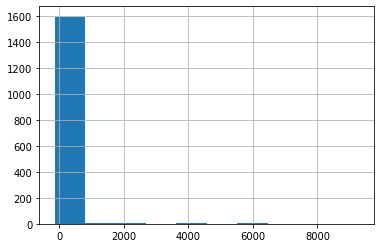

In [142]:
df_wf['p_27'].hist()

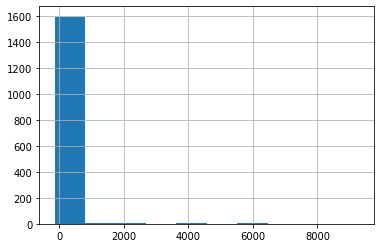

In [143]:
df_wf['p_27'].hist()

In [144]:
df_wf['p_27'].sum()

108440.13693087082

### So I have the deferred waterfall by DC, period, BU.
# I need to groupby BU and Period

In [145]:
df_wf_gb = df_wf.groupby(['BU', 'period']).sum()

In [146]:
df_wf_gb['p_27'].sum()

108440.13693087081

In [147]:
df_wf_gb.head(40)

Total           p_1           p_2           p_3  \
BU                 period                                                     
Digital Experience 2020-07      0  4.154825e+07  4.076013e+07  3.574676e+07   
                   2020-08      0  6.437627e+07  5.867360e+07  5.116314e+07   
                   2020-09      0  1.000509e+08  9.180232e+07  8.645629e+07   
                   2020-10      0  1.245633e+08  1.187256e+08  1.105773e+08   
                   2020-11      0  1.570176e+08  1.484765e+08  1.404566e+08   
                   2020-12      0  1.887256e+08  1.803382e+08  1.745268e+08   
                   2021-01      0  2.029145e+08  1.968591e+08  1.886194e+08   
                   2021-02      0  2.159175e+08  2.075815e+08  1.998470e+08   
                   2021-03      0  2.237692e+08  2.160379e+08  2.104064e+08   
                   2021-04      0  2.361310e+08  2.306010e+08  2.071699e+08   
                   2021-05      0  2.420762e+08  2.188454e+08  1.869921e+08   
                   2021-06      0  2.295923e+08  1.981129e+08  1.663223e+08   
Digital Media      2020-07      0  2.090935e+08  4.961025e+07  4.927535e+07   
                   2020-08      0  2.610932e+08  9.889067e+07  9.854057e+07   
                   2020-09      0  3.802869e+08  1.746209e+08  1.745804e+08   
                   2020-10      0  3.937134e+08  2.270378e+08  2.265988e+08   
                   2020-11      0  4.470946e+08  2.776378e+08  2.771934e+08   
                   2020-12      0  5.790872e+08  3.643918e+08  3.643143e+08   
                   2021-01      0  6.101843e+08  3.928673e+08  3.924686e+08   
                   2021-02      0  5.911591e+08  4.145776e+08  4.142100e+08   
                   2021-03      0  6.715054e+08  4.479193e+08  4.478771e+08   
                   2021-04      0  6.523312e+08  4.715704e+08  4.467537e+08   
                   2021-05      0  6.741786e+08  4.662686e+08  4.166890e+08   
                   2021-06      0  7.238412e+08  4.424263e+08  3.796197e+08   
Publishing         2020-07      0  1.180876e+06  9.343232e+05  9.151925e+05   
                   2020-08      0  1.934396e+06  1.670342e+06  1.615719e+06   
                   2020-09      0  3.702697e+06  3.343957e+06  3.307666e+06   
                   2020-10      0  4.717068e+06  4.439112e+06  4.418853e+06   
                   2020-11      0  5.696634e+06  5.436339e+06  5.380011e+06   
                   2020-12      0  7.283327e+06  6.928990e+06  6.891272e+06   
                   2021-01      0  7.868827e+06  7.535125e+06  7.515140e+06   
                   2021-02      0  8.467519e+06  8.212367e+06  8.157505e+06   
                   2021-03      0  9.558787e+06  9.211991e+06  9.169033e+06   
                   2021-04      0  1.026689e+07  9.992015e+06  9.519462e+06   
                   2021-05      0  1.118965e+07  1.048680e+07  9.645337e+06   
                   2021-06      0  1.209646e+07  1.096917e+07  9.731255e+06   

                                     p_4           p_5           p_6  \
BU                 period                                              
Digital Experience 2020-07  3.073339e+07  3.073339e+07  3.044889e+07   
                   2020-08  4.866604e+07  4.838154e+07  4.787500e+07   
                   2020-09  8.332284e+07  8.281630e+07  8.235306e+07   
                   2020-10  1.050558e+08  1.045926e+08  1.042191e+08   
                   2020-11  1.374948e+08  1.371214e+08  1.369034e+08   
                   2020-12  1.713036e+08  1.710856e+08  1.708049e+08   
                   2021-01  1.833849e+08  1.831042e+08  1.675421e+08   
                   2021-02  1.970663e+08  1.815042e+08  1.571705e+08   
                   2021-03  1.919936e+08  1.676599e+08  1.412223e+08   
                   2021-04  1.778180e+08  1.513804e+08  1.227897e+08   
                   2021-05  1.580531e+08  1.294624e+08  1.018950e+08   
                   2021-06  1.348800e+08  1.073126e+08  7.377359e+07   
Digital Media    

### Now we need to group the BU to match the waterfall BUs

In [148]:
df_wf_gb.index

MultiIndex([('Digital Experience', '2020-07'),
            ('Digital Experience', '2020-08'),
            ('Digital Experience', '2020-09'),
            ('Digital Experience', '2020-10'),
            ('Digital Experience', '2020-11'),
            ('Digital Experience', '2020-12'),
            ('Digital Experience', '2021-01'),
            ('Digital Experience', '2021-02'),
            ('Digital Experience', '2021-03'),
            ('Digital Experience', '2021-04'),
            ('Digital Experience', '2021-05'),
            ('Digital Experience', '2021-06'),
            (     'Digital Media', '2020-07'),
            (     'Digital Media', '2020-08'),
            (     'Digital Media', '2020-09'),
            (     'Digital Media', '2020-10'),
            (     'Digital Media', '2020-11'),
            (     'Digital Media', '2020-12'),
            (     'Digital Media', '2021-01'),
            (     'Digital Media', '2021-02'),
            (     'Digital Media', '2021-03'),
            (

In [149]:
df_waterfall

,As Performed / Upon Acceptance,P01,P02,P03,P04,P05,P06,P07,P08,P09,...,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26
External Reporting BU,,,,,,,,,,,,,,,,,,,,,
Digital Experience,5.072172e+06,1.664945e+08,1.664945e+08,1.017679e+08,1.017679e+08,1.017679e+08,5.794085e+07,5.794085e+07,5.794085e+07,1.712937e+07,...,3.813405e+06,1162279.85,1162279.85,1162279.85,8.226450e+05,8.226450e+05,8.226450e+05,1.672184e+06,1.672184e+06,1.672184e+06
Digital Media,5.601745e+06,3.506325e+08,3.506325e+08,2.191780e+08,2.191780e+08,2.191780e+08,1.279252e+08,1.279252e+08,1.279252e+08,4.023382e+07,...,2.773333e+06,1807709.00,1807709.00,1807709.00,1.288270e+06,1.288270e+06,1.288270e+06,2.164146e+07,2.164146e+07,2.164146e+07
Grand inclusive of Magento/Marketo,1.067392e+07,5.274594e+08,5.274594e+08,3.275887e+08,3.275887e+08,3.275887e+08,1.897708e+08,1.897708e+08,1.897708e+08,5.914232e+07,...,6.856067e+06,3085663.85,3085663.85,3085663.85,2.155525e+06,2.155525e+06,2.155525e+06,2.335949e+07,2.335949e+07,2.335949e+07
Publishing,0.000000e+00,1.033243e+07,1.033243e+07,6.642776e+06,6.642776e+06,6.642776e+06,3.904775e+06,3.904775e+06,3.904775e+06,1.779139e+06,...,2.693293e+05,115675.00,115675.00,115675.00,4.461067e+04,4.461067e+04,4.461067e+04,4.584667e+04,4.584667e+04,4.584667e+04


In [150]:
df_wf_gb.reset_index(inplace=True)

In [151]:
df_wf_gb.head(5)

,BU,period,Total,p_1,p_2,p_3,p_4,p_5,p_6,p_7,...,p_27,p_28,p_29,p_30,p_31,p_32,p_33,p_34,p_35,p_36
0,Digital Experience,2020-07,0,4.154825e+07,4.076013e+07,3.574676e+07,3.073339e+07,3.073339e+07,3.044889e+07,3.016439e+07,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Digital Experience,2020-08,0,6.437627e+07,5.867360e+07,5.116314e+07,4.866604e+07,4.838154e+07,4.787500e+07,4.765296e+07,...,121.986287,121.986287,121.986287,121.986287,121.986287,121.986287,121.986287,121.986287,121.986287,60.993143
2,Digital Experience,2020-09,0,1.000509e+08,9.180232e+07,8.645629e+07,8.332284e+07,8.281630e+07,8.235306e+07,8.211186e+07,...,88.691522,88.691522,88.691522,88.691522,88.691522,88.691522,88.691522,88.691522,27.698379,-16.647382
3,Digital Experience,2020-10,0,1.245633e+08,1.187256e+08,1.105773e+08,1.050558e+08,1.045926e+08,1.042191e+08,1.040869e+08,...,680.882311,680.882311,680.882311,680.882311,680.882311,680.882311,680.882311,619.889167,575.543407,296.095394
4,Digital Experience,2020-11,0,1.570176e+08,1.484765e+08,1.404566e+08,1.374948e+08,1.371214e+08,1.369034e+08,1.368177e+08,...,7460.359649,7460.359649,7460.359649,7460.359649,7460.359649,7460.359649,7399.366505,7355.020744,7075.572732,3389.738669


### Change the BU to match the waterfall BUs
 - Creative to Digital Media
 - Document Cloud to Digital Media
 - Print & Publishing to Publishing
 - DX Other to Digital Experience
 - Experience Cloud to Digital Experience

In [156]:
new_slice = df_wf_gb[df_wf_gb['BU']=='Digital Experience']

In [157]:
new_slice

,BU,period,Total,p_1,p_2,p_3,p_4,p_5,p_6,p_7,...,p_27,p_28,p_29,p_30,p_31,p_32,p_33,p_34,p_35,p_36
0,Digital Experience,2020-07,0,4.154825e+07,4.076013e+07,3.574676e+07,3.073339e+07,3.073339e+07,3.044889e+07,3.016439e+07,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Digital Experience,2020-08,0,6.437627e+07,5.867360e+07,5.116314e+07,4.866604e+07,4.838154e+07,4.787500e+07,4.765296e+07,...,121.986287,121.986287,121.986287,121.986287,121.986287,121.986287,121.986287,121.986287,121.986287,60.993143
2,Digital Experience,2020-09,0,1.000509e+08,9.180232e+07,8.645629e+07,8.332284e+07,8.281630e+07,8.235306e+07,8.211186e+07,...,88.691522,88.691522,88.691522,88.691522,88.691522,88.691522,88.691522,88.691522,27.698379,-16.647382
3,Digital Experience,2020-10,0,1.245633e+08,1.187256e+08,1.105773e+08,1.050558e+08,1.045926e+08,1.042191e+08,1.040869e+08,...,680.882311,680.882311,680.882311,680.882311,680.882311,680.882311,680.882311,619.889167,575.543407,296.095394
4,Digital Experience,2020-11,0,1.570176e+08,1.484765e+08,1.404566e+08,1.374948e+08,1.371214e+08,1.369034e+08,1.368177e+08,...,7460.359649,7460.359649,7460.359649,7460.359649,7460.359649,7460.359649,7399.366505,7355.020744,7075.572732,3389.738669
5,Digital Experience,2020-12,0,1.887256e+08,1.803382e+08,1.745268e+08,1.713036e+08,1.710856e+08,1.708049e+08,1.555277e+08,...,7497.054093,7497.054093,7497.054093,7497.054093,7497.054093,7436.060950,7391.715189,7112.267177,3426.433113,18.347222
6,Digital Experience,2021-01,0,2.029145e+08,1.968591e+08,1.886194e+08,1.833849e+08,1.831042e+08,1.675421e+08,1.434308e+08,...,7875.776315,7875.776315,7875.776315,7875.776315,7814.783172,7770.437411,7490.989399,3805.155336,397.069444,189.361111
7,Digital Experience,2021-02,0,2.159175e+08,2.075815e+08,1.998470e+08,1.970663e+08,1.815042e+08,1.571705e+08,1.309744e+08,...,11232.595482,11232.595482,11232.595482,11171.602339,11127.256578,10847.808566,7161.974502,3753.888611,3546.180278,1678.409583
8,Digital Experience,2021-03,0,2.237692e+08,2.160379e+08,2.104064e+08,1.919936e+08,1.676599e+08,1.412223e+08,1.127641e+08,...,8025.593167,8025.593167,7964.600024,7920.254263,7640.806251,3954.972187,546.886296,339.177963,-1528.592731,-1603.501157
9,Digital Experience,2021-04,0,2.361310e+08,2.306010e+08,2.071699e+08,1.778180e+08,1.513804e+08,1.227897e+08,9.530803e+07,...,8025.593167,7964.600024,7920.254263,7640.806251,3954.972187,546.886296,339.177963,-1528.592731,-1603.501157,0.000000


### The problem is here!
We have a sum problem with digital experience



In [71]:
#df_wf_gb2 = df_wf_gb.groupby(['BU', 'period']).sum()

In [72]:
#df_wf_gb2

Total           p_1           p_2           p_3  \
BU                 period                                                     
Digital Experience 2020-07      0  4.154825e+07  4.076013e+07  3.574676e+07   
                   2020-08      0  6.437627e+07  5.867360e+07  5.116314e+07   
                   2020-09      0  1.000509e+08  9.180232e+07  8.645629e+07   
                   2020-10      0  1.245633e+08  1.187256e+08  1.105773e+08   
                   2020-11      0  1.570176e+08  1.484765e+08  1.404566e+08   
                   2020-12      0  1.887256e+08  1.803382e+08  1.745268e+08   
                   2021-01      0  2.029145e+08  1.968591e+08  1.886194e+08   
                   2021-02      0  2.159175e+08  2.075815e+08  1.998470e+08   
                   2021-03      0  2.237692e+08  2.160379e+08  2.104064e+08   
                   2021-04      0  2.361310e+08  2.306010e+08  2.071699e+08   
                   2021-05      0  2.420762e+08  2.188454e+08  1.869921e+08   
                   2021-06      0  2.295923e+08  1.981129e+08  1.663223e+08   
Digital Media      2020-07      0  2.090935e+08  4.961025e+07  4.927535e+07   
                   2020-08      0  2.610932e+08  9.889067e+07  9.854057e+07   
                   2020-09      0  3.802869e+08  1.746209e+08  1.745804e+08   
                   2020-10      0  3.937134e+08  2.270378e+08  2.265988e+08   
                   2020-11      0  4.470946e+08  2.776378e+08  2.771934e+08   
                   2020-12      0  5.790872e+08  3.643918e+08  3.643143e+08   
                   2021-01      0  6.101843e+08  3.928673e+08  3.924686e+08   
                   2021-02      0  5.911591e+08  4.145776e+08  4.142100e+08   
                   2021-03      0  6.715054e+08  4.479193e+08  4.478771e+08   
                   2021-04      0  6.523312e+08  4.715704e+08  4.467537e+08   
                   2021-05      0  6.741786e+08  4.662686e+08  4.166890e+08   
                   2021-06      0  7.238412e+08  4.424263e+08  3.796197e+08   
Publishing         2020-07      0  1.180876e+06  9.343232e+05  9.151925e+05   
                   2020-08      0  1.934396e+06  1.670342e+06  1.615719e+06   
                   2020-09      0  3.702697e+06  3.343957e+06  3.307666e+06   
                   2020-10      0  4.717068e+06  4.439112e+06  4.418853e+06   
                   2020-11      0  5.696634e+06  5.436339e+06  5.380011e+06   
                   2020-12      0  7.283327e+06  6.928990e+06  6.891272e+06   
                   2021-01      0  7.868827e+06  7.535125e+06  7.515140e+06   
                   2021-02      0  8.467519e+06  8.212367e+06  8.157505e+06   
                   2021-03      0  9.558787e+06  9.211991e+06  9.169033e+06   
                   2021-04      0  1.026689e+07  9.992015e+06  9.519462e+06   
                   2021-05      0  1.118965e+07  1.048680e+07  9.645337e+06   
                   2021-06      0  1.209646e+07  1.096917e+07  9.731255e+06   

                                     p_4           p_5           p_6  \
BU                 period                                              
Digital Experience 2020-07  3.073339e+07  3.073339e+07  3.044889e+07   
                   2020-08  4.866604e+07  4.838154e+07  4.787500e+07   
                   2020-09  8.332284e+07  8.281630e+07  8.235306e+07   
                   2020-10  1.050558e+08  1.045926e+08  1.042191e+08   
                   2020-11  1.374948e+08  1.371214e+08  1.369034e+08   
                   2020-12  1.713036e+08  1.710856e+08  1.708049e+08   
                   2021-01  1.833849e+08  1.831042e+08  1.675421e+08   
                   2021-02  1.970663e+08  1.815042e+08  1.571705e+08   
                   2021-03  1.919936e+08  1.676599e+08  1.412223e+08   
                   2021-04  1.778180e+08  1.513804e+08  1.227897e+08   
                   2021-05  1.580531e+08  1.294624e+08  1.018950e+08   
                   2021-06  1.348800e+08  1.073126e+08  7.377359e+07   
Digital Media    

## Altering the initial waterfall fields

In [160]:
df_waterfall

,As Performed / Upon Acceptance,P01,P02,P03,P04,P05,P06,P07,P08,P09,...,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26
External Reporting BU,,,,,,,,,,,,,,,,,,,,,
Digital Experience,5.072172e+06,1.664945e+08,1.664945e+08,1.017679e+08,1.017679e+08,1.017679e+08,5.794085e+07,5.794085e+07,5.794085e+07,1.712937e+07,...,3.813405e+06,1162279.85,1162279.85,1162279.85,8.226450e+05,8.226450e+05,8.226450e+05,1.672184e+06,1.672184e+06,1.672184e+06
Digital Media,5.601745e+06,3.506325e+08,3.506325e+08,2.191780e+08,2.191780e+08,2.191780e+08,1.279252e+08,1.279252e+08,1.279252e+08,4.023382e+07,...,2.773333e+06,1807709.00,1807709.00,1807709.00,1.288270e+06,1.288270e+06,1.288270e+06,2.164146e+07,2.164146e+07,2.164146e+07
Publishing,0.000000e+00,1.033243e+07,1.033243e+07,6.642776e+06,6.642776e+06,6.642776e+06,3.904775e+06,3.904775e+06,3.904775e+06,1.779139e+06,...,2.693293e+05,115675.00,115675.00,115675.00,4.461067e+04,4.461067e+04,4.461067e+04,4.584667e+04,4.584667e+04,4.584667e+04


In [159]:
df_waterfall.drop('Grand inclusive of Magento/Marketo', inplace=True)

## Take the As Performed / Upon Acceptance column and place this into the df_wf_gb dataframe.
## We will assume that this does not change over time 

In [161]:
df_as_performed = df_waterfall['As Performed / Upon Acceptance'].copy()


In [162]:
df_as_performed

External Reporting BU
Digital Experience    5.072172e+06
Digital Media         5.601745e+06
Publishing            0.000000e+00
Name: As Performed / Upon Acceptance, dtype: float64

In [163]:
df_waterfall = df_waterfall.drop('As Performed / Upon Acceptance', axis=1)

In [164]:
df_waterfall

,P01,P02,P03,P04,P05,P06,P07,P08,P09,P10,...,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26
External Reporting BU,,,,,,,,,,,,,,,,,,,,,
Digital Experience,1.664945e+08,1.664945e+08,1.017679e+08,1.017679e+08,1.017679e+08,5.794085e+07,5.794085e+07,5.794085e+07,1.712937e+07,1.712937e+07,...,3.813405e+06,1162279.85,1162279.85,1162279.85,8.226450e+05,8.226450e+05,8.226450e+05,1.672184e+06,1.672184e+06,1.672184e+06
Digital Media,3.506325e+08,3.506325e+08,2.191780e+08,2.191780e+08,2.191780e+08,1.279252e+08,1.279252e+08,1.279252e+08,4.023382e+07,4.023382e+07,...,2.773333e+06,1807709.00,1807709.00,1807709.00,1.288270e+06,1.288270e+06,1.288270e+06,2.164146e+07,2.164146e+07,2.164146e+07
Publishing,1.033243e+07,1.033243e+07,6.642776e+06,6.642776e+06,6.642776e+06,3.904775e+06,3.904775e+06,3.904775e+06,1.779139e+06,1.779139e+06,...,2.693293e+05,115675.00,115675.00,115675.00,4.461067e+04,4.461067e+04,4.461067e+04,4.584667e+04,4.584667e+04,4.584667e+04


## Changing the periods in the df_wf_gb to match the df_watefall first

In [166]:
old_cols = df_wf_gb.columns
old_cols = old_cols[3:]

In [167]:
new_columns = []
for i in range(12*3):
    if len(str(i+1))==1:
        new_column = 'P0'+ str(i+1)
    else:
        new_column = 'P'+ str(i+1)
    new_columns.append(new_column)

In [168]:
rename_dict = dict(zip(old_cols, new_columns))
df_wf_gb = df_wf_gb.rename(columns=rename_dict)


In [169]:
df_wf_gb

,BU,period,Total,P01,P02,P03,P04,P05,P06,P07,...,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36
0,Digital Experience,2020-07,0,4.154825e+07,4.076013e+07,3.574676e+07,3.073339e+07,3.073339e+07,3.044889e+07,3.016439e+07,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Digital Experience,2020-08,0,6.437627e+07,5.867360e+07,5.116314e+07,4.866604e+07,4.838154e+07,4.787500e+07,4.765296e+07,...,121.986287,121.986287,121.986287,121.986287,121.986287,121.986287,121.986287,121.986287,121.986287,60.993143
2,Digital Experience,2020-09,0,1.000509e+08,9.180232e+07,8.645629e+07,8.332284e+07,8.281630e+07,8.235306e+07,8.211186e+07,...,88.691522,88.691522,88.691522,88.691522,88.691522,88.691522,88.691522,88.691522,27.698379,-16.647382
3,Digital Experience,2020-10,0,1.245633e+08,1.187256e+08,1.105773e+08,1.050558e+08,1.045926e+08,1.042191e+08,1.040869e+08,...,680.882311,680.882311,680.882311,680.882311,680.882311,680.882311,680.882311,619.889167,575.543407,296.095394
4,Digital Experience,2020-11,0,1.570176e+08,1.484765e+08,1.404566e+08,1.374948e+08,1.371214e+08,1.369034e+08,1.368177e+08,...,7460.359649,7460.359649,7460.359649,7460.359649,7460.359649,7460.359649,7399.366505,7355.020744,7075.572732,3389.738669
5,Digital Experience,2020-12,0,1.887256e+08,1.803382e+08,1.745268e+08,1.713036e+08,1.710856e+08,1.708049e+08,1.555277e+08,...,7497.054093,7497.054093,7497.054093,7497.054093,7497.054093,7436.060950,7391.715189,7112.267177,3426.433113,18.347222
6,Digital Experience,2021-01,0,2.029145e+08,1.968591e+08,1.886194e+08,1.833849e+08,1.831042e+08,1.675421e+08,1.434308e+08,...,7875.776315,7875.776315,7875.776315,7875.776315,7814.783172,7770.437411,7490.989399,3805.155336,397.069444,189.361111
7,Digital Experience,2021-02,0,2.159175e+08,2.075815e+08,1.998470e+08,1.970663e+08,1.815042e+08,1.571705e+08,1.309744e+08,...,11232.595482,11232.595482,11232.595482,11171.602339,11127.256578,10847.808566,7161.974502,3753.888611,3546.180278,1678.409583
8,Digital Experience,2021-03,0,2.237692e+08,2.160379e+08,2.104064e+08,1.919936e+08,1.676599e+08,1.412223e+08,1.127641e+08,...,8025.593167,8025.593167,7964.600024,7920.254263,7640.806251,3954.972187,546.886296,339.177963,-1528.592731,-1603.501157
9,Digital Experience,2021-04,0,2.361310e+08,2.306010e+08,2.071699e+08,1.778180e+08,1.513804e+08,1.227897e+08,9.530803e+07,...,8025.593167,7964.600024,7920.254263,7640.806251,3954.972187,546.886296,339.177963,-1528.592731,-1603.501157,0.000000


In [170]:
list_periods = df_wf_gb.period.unique()
list_periods

array(['2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
       '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06'],
      dtype=object)

In [171]:
df_waterfall

,P01,P02,P03,P04,P05,P06,P07,P08,P09,P10,...,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26
External Reporting BU,,,,,,,,,,,,,,,,,,,,,
Digital Experience,1.664945e+08,1.664945e+08,1.017679e+08,1.017679e+08,1.017679e+08,5.794085e+07,5.794085e+07,5.794085e+07,1.712937e+07,1.712937e+07,...,3.813405e+06,1162279.85,1162279.85,1162279.85,8.226450e+05,8.226450e+05,8.226450e+05,1.672184e+06,1.672184e+06,1.672184e+06
Digital Media,3.506325e+08,3.506325e+08,2.191780e+08,2.191780e+08,2.191780e+08,1.279252e+08,1.279252e+08,1.279252e+08,4.023382e+07,4.023382e+07,...,2.773333e+06,1807709.00,1807709.00,1807709.00,1.288270e+06,1.288270e+06,1.288270e+06,2.164146e+07,2.164146e+07,2.164146e+07
Publishing,1.033243e+07,1.033243e+07,6.642776e+06,6.642776e+06,6.642776e+06,3.904775e+06,3.904775e+06,3.904775e+06,1.779139e+06,1.779139e+06,...,2.693293e+05,115675.00,115675.00,115675.00,4.461067e+04,4.461067e+04,4.461067e+04,4.584667e+04,4.584667e+04,4.584667e+04


In [172]:
list_BU = df_wf_gb.BU.unique()

In [173]:
list_BU


array(['Digital Experience', 'Digital Media', 'Publishing'], dtype=object)

In [174]:
df_waterfall['period'] = '2020-07'
df_waterfall

,P01,P02,P03,P04,P05,P06,P07,P08,P09,P10,...,P18,P19,P20,P21,P22,P23,P24,P25,P26,period
External Reporting BU,,,,,,,,,,,,,,,,,,,,,
Digital Experience,1.664945e+08,1.664945e+08,1.017679e+08,1.017679e+08,1.017679e+08,5.794085e+07,5.794085e+07,5.794085e+07,1.712937e+07,1.712937e+07,...,1162279.85,1162279.85,1162279.85,8.226450e+05,8.226450e+05,8.226450e+05,1.672184e+06,1.672184e+06,1.672184e+06,2020-07
Digital Media,3.506325e+08,3.506325e+08,2.191780e+08,2.191780e+08,2.191780e+08,1.279252e+08,1.279252e+08,1.279252e+08,4.023382e+07,4.023382e+07,...,1807709.00,1807709.00,1807709.00,1.288270e+06,1.288270e+06,1.288270e+06,2.164146e+07,2.164146e+07,2.164146e+07,2020-07
Publishing,1.033243e+07,1.033243e+07,6.642776e+06,6.642776e+06,6.642776e+06,3.904775e+06,3.904775e+06,3.904775e+06,1.779139e+06,1.779139e+06,...,115675.00,115675.00,115675.00,4.461067e+04,4.461067e+04,4.461067e+04,4.584667e+04,4.584667e+04,4.584667e+04,2020-07


In [175]:
df_waterfall=df_waterfall.reset_index()
df_waterfall

,External Reporting BU,P01,P02,P03,P04,P05,P06,P07,P08,P09,...,P18,P19,P20,P21,P22,P23,P24,P25,P26,period
0,Digital Experience,1.664945e+08,1.664945e+08,1.017679e+08,1.017679e+08,1.017679e+08,5.794085e+07,5.794085e+07,5.794085e+07,1.712937e+07,...,1162279.85,1162279.85,1162279.85,8.226450e+05,8.226450e+05,8.226450e+05,1.672184e+06,1.672184e+06,1.672184e+06,2020-07
1,Digital Media,3.506325e+08,3.506325e+08,2.191780e+08,2.191780e+08,2.191780e+08,1.279252e+08,1.279252e+08,1.279252e+08,4.023382e+07,...,1807709.00,1807709.00,1807709.00,1.288270e+06,1.288270e+06,1.288270e+06,2.164146e+07,2.164146e+07,2.164146e+07,2020-07
2,Publishing,1.033243e+07,1.033243e+07,6.642776e+06,6.642776e+06,6.642776e+06,3.904775e+06,3.904775e+06,3.904775e+06,1.779139e+06,...,115675.00,115675.00,115675.00,4.461067e+04,4.461067e+04,4.461067e+04,4.584667e+04,4.584667e+04,4.584667e+04,2020-07


In [176]:
df_waterfall.rename(columns={'External Reporting BU': 'BU'}, inplace=True)
df_waterfall

,BU,P01,P02,P03,P04,P05,P06,P07,P08,P09,...,P18,P19,P20,P21,P22,P23,P24,P25,P26,period
0,Digital Experience,1.664945e+08,1.664945e+08,1.017679e+08,1.017679e+08,1.017679e+08,5.794085e+07,5.794085e+07,5.794085e+07,1.712937e+07,...,1162279.85,1162279.85,1162279.85,8.226450e+05,8.226450e+05,8.226450e+05,1.672184e+06,1.672184e+06,1.672184e+06,2020-07
1,Digital Media,3.506325e+08,3.506325e+08,2.191780e+08,2.191780e+08,2.191780e+08,1.279252e+08,1.279252e+08,1.279252e+08,4.023382e+07,...,1807709.00,1807709.00,1807709.00,1.288270e+06,1.288270e+06,1.288270e+06,2.164146e+07,2.164146e+07,2.164146e+07,2020-07
2,Publishing,1.033243e+07,1.033243e+07,6.642776e+06,6.642776e+06,6.642776e+06,3.904775e+06,3.904775e+06,3.904775e+06,1.779139e+06,...,115675.00,115675.00,115675.00,4.461067e+04,4.461067e+04,4.461067e+04,4.584667e+04,4.584667e+04,4.584667e+04,2020-07


## ADDING ADDITONAL PERIODS HERE TO MERGE WITH df_wf

In [177]:
df_waterfall['P28'] = 0
df_waterfall['P29'] = 0
df_waterfall['P30'] = 0
df_waterfall['P31'] = 0
df_waterfall['P32'] = 0
df_waterfall['P33'] = 0
df_waterfall['P34'] = 0
df_waterfall['P35'] = 0
df_waterfall['P36'] = 0


In [178]:
df_waterfall.head(10)

,BU,P01,P02,P03,P04,P05,P06,P07,P08,P09,...,period,P28,P29,P30,P31,P32,P33,P34,P35,P36
0,Digital Experience,1.664945e+08,1.664945e+08,1.017679e+08,1.017679e+08,1.017679e+08,5.794085e+07,5.794085e+07,5.794085e+07,1.712937e+07,...,2020-07,0,0,0,0,0,0,0,0,0
1,Digital Media,3.506325e+08,3.506325e+08,2.191780e+08,2.191780e+08,2.191780e+08,1.279252e+08,1.279252e+08,1.279252e+08,4.023382e+07,...,2020-07,0,0,0,0,0,0,0,0,0
2,Publishing,1.033243e+07,1.033243e+07,6.642776e+06,6.642776e+06,6.642776e+06,3.904775e+06,3.904775e+06,3.904775e+06,1.779139e+06,...,2020-07,0,0,0,0,0,0,0,0,0


##### Planning on making a new datagframe with BU and period and merging them. Will create NAs everywhere else, but we will fillna

In [179]:
list_periods =list_periods[1:]
list_periods

array(['2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01',
       '2021-02', '2021-03', '2021-04', '2021-05', '2021-06'],
      dtype=object)

In [180]:
list_BU

array(['Digital Experience', 'Digital Media', 'Publishing'], dtype=object)

In [181]:
to_df_BU = []
to_df_period = []
for item in list_BU:
    
    for per in list_periods:
        to_df_BU.append(item)
        to_df_period.append(per)

In [182]:
len(to_df_BU)

33

### Creating new dataframe to be merged

In [183]:
df_to_merge = pd.DataFrame({'BU': to_df_BU, 'period': to_df_period})

In [184]:
df_waterfall = df_waterfall.merge(df_to_merge, on=['BU', 'period'], how='outer')

In [185]:
df_waterfall.fillna(0, inplace=True)

In [186]:
df_waterfall.sort_values(by = ['BU', 'period'], inplace=True)

In [187]:
df_waterfall

,BU,P01,P02,P03,P04,P05,P06,P07,P08,P09,...,period,P28,P29,P30,P31,P32,P33,P34,P35,P36
0,Digital Experience,1.664945e+08,1.664945e+08,1.017679e+08,1.017679e+08,1.017679e+08,5.794085e+07,5.794085e+07,5.794085e+07,1.712937e+07,...,2020-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Digital Experience,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2020-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Digital Experience,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2020-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Digital Experience,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2020-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Digital Experience,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2020-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Digital Experience,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2020-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Digital Experience,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2021-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Digital Experience,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2021-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,Digital Experience,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2021-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,Digital Experience,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2021-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Now move the waterfall forward by BU

In [188]:
def bring_slice_wf_forward(df):
    wf_cols_copy = df.columns[df.columns.str.contains('P')]
    print(wf_cols_copy)
    df = df.reset_index(drop=True)
    for index, row in df.iterrows():
    
        if index <len(df) - 1:            
            this_row = df.loc[index, wf_cols_copy].to_numpy()            
            this_row = np.delete(this_row, 0)
            this_row = np.append(this_row, [0])           
            df.loc[index+1, wf_cols_copy] += this_row          
            
    return df

In [189]:
def bring_initial_wf_forward(df_waterfall):
    
    
    list_BU = df_waterfall['BU'].unique()
    
    
    for i in range(len(list_BU)):    
        this_BU = list_BU[i]
        this_slice = df_waterfall[df_waterfall['BU']==this_BU].copy()
        
        
        df_this_wf = bring_slice_wf_forward(this_slice)
        
        if i == 0:
            df_wf = df_this_wf.copy()
        else:
            df_wf = pd.concat([df_wf, df_this_wf], sort=False)
        
    df_wf.reset_index(drop=True, inplace=True)
    return df_wf


In [190]:
df_waterfall = bring_initial_wf_forward(df_waterfall)

Index(['P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09', 'P10',
       'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20',
       'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P28', 'P29', 'P30', 'P31',
       'P32', 'P33', 'P34', 'P35', 'P36'],
      dtype='object')
Index(['P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09', 'P10',
       'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20',
       'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P28', 'P29', 'P30', 'P31',
       'P32', 'P33', 'P34', 'P35', 'P36'],
      dtype='object')
Index(['P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09', 'P10',
       'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20',
       'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P28', 'P29', 'P30', 'P31',
       'P32', 'P33', 'P34', 'P35', 'P36'],
      dtype='object')


In [191]:
df_waterfall

,BU,P01,P02,P03,P04,P05,P06,P07,P08,P09,...,period,P28,P29,P30,P31,P32,P33,P34,P35,P36
0,Digital Experience,1.664945e+08,1.664945e+08,1.017679e+08,1.017679e+08,1.017679e+08,5.794085e+07,5.794085e+07,5.794085e+07,1.712937e+07,...,2020-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Digital Experience,1.664945e+08,1.017679e+08,1.017679e+08,1.017679e+08,5.794085e+07,5.794085e+07,5.794085e+07,1.712937e+07,1.712937e+07,...,2020-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Digital Experience,1.017679e+08,1.017679e+08,1.017679e+08,5.794085e+07,5.794085e+07,5.794085e+07,1.712937e+07,1.712937e+07,1.712937e+07,...,2020-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Digital Experience,1.017679e+08,1.017679e+08,5.794085e+07,5.794085e+07,5.794085e+07,1.712937e+07,1.712937e+07,1.712937e+07,5.578098e+06,...,2020-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Digital Experience,1.017679e+08,5.794085e+07,5.794085e+07,5.794085e+07,1.712937e+07,1.712937e+07,1.712937e+07,5.578098e+06,5.578098e+06,...,2020-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Digital Experience,5.794085e+07,5.794085e+07,5.794085e+07,1.712937e+07,1.712937e+07,1.712937e+07,5.578098e+06,5.578098e+06,5.578098e+06,...,2020-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Digital Experience,5.794085e+07,5.794085e+07,1.712937e+07,1.712937e+07,1.712937e+07,5.578098e+06,5.578098e+06,5.578098e+06,3.813405e+06,...,2021-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Digital Experience,5.794085e+07,1.712937e+07,1.712937e+07,1.712937e+07,5.578098e+06,5.578098e+06,5.578098e+06,3.813405e+06,3.813405e+06,...,2021-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Digital Experience,1.712937e+07,1.712937e+07,1.712937e+07,5.578098e+06,5.578098e+06,5.578098e+06,3.813405e+06,3.813405e+06,3.813405e+06,...,2021-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Digital Experience,1.712937e+07,1.712937e+07,5.578098e+06,5.578098e+06,5.578098e+06,3.813405e+06,3.813405e+06,3.813405e+06,1.162280e+06,...,2021-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [192]:
df_wf_gb.columns


Index(['BU', 'period', 'Total', 'P01', 'P02', 'P03', 'P04', 'P05', 'P06',
       'P07', 'P08', 'P09', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
       'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26',
       'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36'],
      dtype='object')

In [193]:
df_waterfall.columns

Index(['BU', 'P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09',
       'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19',
       'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'period', 'P28', 'P29',
       'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36'],
      dtype='object')

In [194]:
df_waterfall = df_waterfall.set_index(['BU', 'period'])

In [195]:
df_wf_gb = df_wf_gb.set_index(['BU', 'period'])

In [196]:
df_all = df_waterfall.add(df_wf_gb, fill_value=0)

In [197]:
df_waterfall = df_waterfall.sort_index()
df_all = df_all.sort_index()
df_wf_gb = df_wf_gb.sort_index()

In [199]:
df_all.head(40)

P01           P02           P03  \
BU                 period                                              
Digital Experience 2020-07  2.080427e+08  2.072546e+08  1.375147e+08   
                   2020-08  2.308707e+08  1.604415e+08  1.529311e+08   
                   2020-09  2.018188e+08  1.935702e+08  1.882242e+08   
                   2020-10  2.263312e+08  2.204935e+08  1.685181e+08   
                   2020-11  2.587855e+08  2.064173e+08  1.983974e+08   
                   2020-12  2.466665e+08  2.382791e+08  2.324676e+08   
                   2021-01  2.608553e+08  2.548000e+08  2.057488e+08   
                   2021-02  2.738584e+08  2.247109e+08  2.169764e+08   
                   2021-03  2.408985e+08  2.331673e+08  2.275358e+08   
                   2021-04  2.532604e+08  2.477303e+08  2.127480e+08   
                   2021-05  2.592055e+08  2.244235e+08  1.925702e+08   
                   2021-06  2.351704e+08  2.036910e+08  1.719004e+08   
Digital Media      2020-07  5.597261e+08  4.002428e+08  2.684533e+08   
                   2020-08  6.117258e+08  3.180687e+08  3.177186e+08   
                   2020-09  5.994649e+08  3.937989e+08  3.937584e+08   
                   2020-10  6.128914e+08  4.462158e+08  3.545240e+08   
                   2020-11  6.662726e+08  4.055630e+08  4.051186e+08   
                   2020-12  7.070124e+08  4.923170e+08  4.922395e+08   
                   2021-01  7.381095e+08  5.207925e+08  4.327024e+08   
                   2021-02  7.190843e+08  4.548114e+08  4.544438e+08   
                   2021-03  7.117392e+08  4.881532e+08  4.881109e+08   
                   2021-04  6.925651e+08  5.118042e+08  4.507285e+08   
                   2021-05  7.144124e+08  4.702433e+08  4.206638e+08   
                   2021-06  7.278159e+08  4.464010e+08  3.835944e+08   
Publishing         2020-07  1.151330e+07  1.126675e+07  7.557969e+06   
                   2020-08  1.226682e+07  8.313118e+06  8.258496e+06   
                   2020-09  1.034547e+07  9.986733e+06  9.950442e+06   
                   2020-10  1.135984e+07  1.108189e+07  8.323629e+06   
                   2020-11  1.233941e+07  9.341115e+06  9.284787e+06   
                   2020-12  1.118810e+07  1.083377e+07  1.079605e+07   
                   2021-01  1.177360e+07  1.143990e+07  9.294279e+06   
                   2021-02  1.237229e+07  9.991506e+06  9.936645e+06   
                   2021-03  1.133793e+07  1.099113e+07  1.094817e+07   
                   2021-04  1.204603e+07  1.177115e+07  1.061296e+07   
                   2021-05  1.296879e+07  1.158030e+07  1.073883e+07   
                   2021-06  1.318996e+07  1.206266e+07  1.082475e+07   

                                     P04           P05           P06  \
BU                 period                                              
Digital Experience 2020-07  1.325013e+08  1.325013e+08  8.838974e+07   
                   2020-08  1.504340e+08  1.063224e+08  1.058158e+08   
                   2020-09  1.412637e+08  1.407572e+08  1.402939e+08   
                   2020-10  1.629967e+08  1.625334e+08  1.213485e+08   
                   2020-11  1.954357e+08  1.542508e+08  1.540328e+08   
                   2020-12  1.884330e+08  1.882150e+08  1.879342e+08   
                   2021-01  2.005143e+08  2.002336e+08  1.731202e+08   
                   2021-02  2.141957e+08  1.870823e+08  1.627486e+08   
                   2021-03  1.975717e+08  1.732380e+08  1.468004e+08   
                   2021-04  1.833961e+08  1.569585e+08  1.266031e+08   
                   2021-05  1.636312e+08  1.332758e+08  1.057084e+08   
                   2021-06  1.386934e+08  1.111261e+08  7.758699e+07   
Digital Media      2020-07  2.681184e+08  2.681184e+08  1.767870e+08   
                   2020-08  3.177034e+08  2.263719e+08  2.262778e+08   
                   2020-09  3.024016e+08  3.023076e+08  3.022705e+08   
                   2020-10  3.540948e+08  3.540578e+08  2.663282e+08   
    

In [202]:
df_wf_gb.head(10)

Total           P01           P02           P03  \
BU                 period                                                     
Digital Experience 2020-07      0  4.154825e+07  4.076013e+07  3.574676e+07   
                   2020-08      0  6.437627e+07  5.867360e+07  5.116314e+07   
                   2020-09      0  1.000509e+08  9.180232e+07  8.645629e+07   
                   2020-10      0  1.245633e+08  1.187256e+08  1.105773e+08   
                   2020-11      0  1.570176e+08  1.484765e+08  1.404566e+08   
                   2020-12      0  1.887256e+08  1.803382e+08  1.745268e+08   
                   2021-01      0  2.029145e+08  1.968591e+08  1.886194e+08   
                   2021-02      0  2.159175e+08  2.075815e+08  1.998470e+08   
                   2021-03      0  2.237692e+08  2.160379e+08  2.104064e+08   
                   2021-04      0  2.361310e+08  2.306010e+08  2.071699e+08   

                                     P04           P05           P06  \
BU                 period                                              
Digital Experience 2020-07  3.073339e+07  3.073339e+07  3.044889e+07   
                   2020-08  4.866604e+07  4.838154e+07  4.787500e+07   
                   2020-09  8.332284e+07  8.281630e+07  8.235306e+07   
                   2020-10  1.050558e+08  1.045926e+08  1.042191e+08   
                   2020-11  1.374948e+08  1.371214e+08  1.369034e+08   
                   2020-12  1.713036e+08  1.710856e+08  1.708049e+08   
                   2021-01  1.833849e+08  1.831042e+08  1.675421e+08   
                   2021-02  1.970663e+08  1.815042e+08  1.571705e+08   
                   2021-03  1.919936e+08  1.676599e+08  1.412223e+08   
                   2021-04  1.778180e+08  1.513804e+08  1.227897e+08   

                                     P07           P08           P09  ...  \
BU                 period                                             ...   
Digital Experience 2020-07  3.016439e+07  3.016439e+07  3.016439e+07  ...   
                   2020-08  4.765296e+07  4.765296e+07  4.765296e+07  ...   
                   2020-09  8.211186e+07  8.211186e+07  8.211186e+07  ...   
                   2020-10  1.040869e+08  1.040869e+08  8.900469e+07  ...   
                   2020-11  1.368177e+08  1.217355e+08  9.790905e+07  ...   
                   2020-12  1.555277e+08  1.317013e+08  1.057276e+08  ...   
                   2021-01  1.434308e+08  1.174572e+08  8.924047e+07  ...   
                   2021-02  1.309744e+08  1.027577e+08  7.540852e+07  ...   
                   2021-03  1.127641e+08  8.541487e+07  5.215679e+07  ...   
                   2021-04  9.530803e+07  6.204996e+07  3.928583e+07  ...   

                                     P27           P28           P29  \
BU                 period                                              
Digital Experience 2020-07      0.000000      0.000000      0.000000   
                   2020-08    121.986287    121.986287    121.986287   
                   2020-09     88.691522     88.691522     88.691522   
                   2020-10    680.882311    680.882311    680.882311   
                   2020-11   7460.359649   7460.359649   7460.359649   
                   2020-12   7497.054093   7497.054093   7497.054093   
                   2021-01   7875.776315   7875.776315   7875.776315   
                   2021-02  11232.595482  11232.595482  11232.595482   
                   2021-03   8025.593167   8025.593167   7964.600024   
                   2021-04   8025.593167   7964.600024   7920.254263   

                                     P30           P31           P32  \
BU                 period                                              
Digital Experience 2020-07      0.000000      0.000000      0.000000   
                   2020-08    121.986287    121.986287    121.986287   
                   2020-09     88.691522     88.691522     88.691522   
                   2020-10    680.882311    680.882311    680.88

In [203]:
df_waterfall.head(10)

P01           P02           P03  \
BU                 period                                              
Digital Experience 2020-07  1.664945e+08  1.664945e+08  1.017679e+08   
                   2020-08  1.664945e+08  1.017679e+08  1.017679e+08   
                   2020-09  1.017679e+08  1.017679e+08  1.017679e+08   
                   2020-10  1.017679e+08  1.017679e+08  5.794085e+07   
                   2020-11  1.017679e+08  5.794085e+07  5.794085e+07   
                   2020-12  5.794085e+07  5.794085e+07  5.794085e+07   
                   2021-01  5.794085e+07  5.794085e+07  1.712937e+07   
                   2021-02  5.794085e+07  1.712937e+07  1.712937e+07   
                   2021-03  1.712937e+07  1.712937e+07  1.712937e+07   
                   2021-04  1.712937e+07  1.712937e+07  5.578098e+06   

                                     P04           P05           P06  \
BU                 period                                              
Digital Experience 2020-07  1.017679e+08  1.017679e+08  5.794085e+07   
                   2020-08  1.017679e+08  5.794085e+07  5.794085e+07   
                   2020-09  5.794085e+07  5.794085e+07  5.794085e+07   
                   2020-10  5.794085e+07  5.794085e+07  1.712937e+07   
                   2020-11  5.794085e+07  1.712937e+07  1.712937e+07   
                   2020-12  1.712937e+07  1.712937e+07  1.712937e+07   
                   2021-01  1.712937e+07  1.712937e+07  5.578098e+06   
                   2021-02  1.712937e+07  5.578098e+06  5.578098e+06   
                   2021-03  5.578098e+06  5.578098e+06  5.578098e+06   
                   2021-04  5.578098e+06  5.578098e+06  3.813405e+06   

                                     P07           P08           P09  \
BU                 period                                              
Digital Experience 2020-07  5.794085e+07  5.794085e+07  1.712937e+07   
                   2020-08  5.794085e+07  1.712937e+07  1.712937e+07   
                   2020-09  1.712937e+07  1.712937e+07  1.712937e+07   
                   2020-10  1.712937e+07  1.712937e+07  5.578098e+06   
                   2020-11  1.712937e+07  5.578098e+06  5.578098e+06   
                   2020-12  5.578098e+06  5.578098e+06  5.578098e+06   
                   2021-01  5.578098e+06  5.578098e+06  3.813405e+06   
                   2021-02  5.578098e+06  3.813405e+06  3.813405e+06   
                   2021-03  3.813405e+06  3.813405e+06  3.813405e+06   
                   2021-04  3.813405e+06  3.813405e+06  1.162280e+06   

                                     P10  ...           P26  P28  P29  P30  \
BU                 period                 ...                                
Digital Experience 2020-07  1.712937e+07  ...  1.672184e+06  0.0  0.0  0.0   
                   2020-08  1.712937e+07  ...  0.000000e+00  0.0  0.0  0.0   
                   2020-09  5.578098e+06  ...  0.000000e+00  0.0  0.0  0.0   
                   2020-10  5.578098e+06  ...  0.000000e+00  0.0  0.0  0.0   
                   2020-11  5.578098e+06  ...  0.000000e+00  0.0  0.0  0.0   
                   2020-12  3.813405e+06  ...  0.000000e+00  0.0  0.0  0.0   
                   2021-01  3.813405e+06  ...  0.000000e+00  0.0  0.0  0.0   
                   2021-02  3.813405e+06  ...  0.000000e+00  0.0  0.0  0.0   
                   2021-03  1.162280e+06  ...  0.000000e+00  0.0  0.0  0.0   
                   2021-04  1.162280e+06  ...  0.000000e+00  0.0  0.0  0.0   

                            P31  P32  P33  P34  P35  P36  
BU                 period                                 
Digital Experience 2020-07  0.0  0.0  0.0  0.0  0.0  0.0  
                   2020-08  0.0  0.0  0.0  0.0  0.0  0.0  
                   2020-09  0.0  0.0  0.0  0.0  0.0  0.0  
                   2020-10  0.0  0.0  0.0  0.0  0.0  0.0  
                   2020-11  0.0  0.0  0.0  0.0  0.0  0.0  
                   2020-12  0.0  0.0  0.0  0.0  0.0  0.0  
                   2021-01  0.0  

#### Sending this data over to excel as a check

In [204]:
with pd.ExcelWriter('output.xlsx') as writer:  
    df_waterfall.to_excel(writer, sheet_name='initial_waterfall')
    df_wf_gb.to_excel(writer, sheet_name='billings_impact')
    df_all.to_excel(writer, sheet_name='combined')
    df_wf.to_excel(writer, sheet_name = 'early_wf')

In [214]:
df_waterfall.columns

Index(['P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09', 'P10',
       'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20',
       'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P28', 'P29', 'P30', 'P31',
       'P32', 'P33', 'P34', 'P35', 'P36'],
      dtype='object')

## Add the as performed back into the waterfall forecast

# I need to create a way to graph this over time

In [212]:
df_all['Total'] = df_all[df_all.columns[:-1]].sum(axis=1)

In [216]:
df_waterfall['Total']= df_waterfall[df_waterfall.columns[:]].sum(axis=1)

In [220]:
df_wf_gb.columns

Index(['Total', 'P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09',
       'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19',
       'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29',
       'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36'],
      dtype='object')

In [221]:
df_wf_gb['Total']  = df_wf_gb[df_wf_gb.columns[1:]].sum(axis=1)

In [226]:
saved_dict.keys()

dict_keys(['model_dict', 'ADBE_cal', 'bookings', 'FX_forwards', 'FX_rates', 'final', 'billings', 'forecast', 'initial_waterfall'])

In [227]:
saved_dict['waterfall']= df_all
saved_dict['bill_waterfall']= df_wf_gb
saved_dict['initial_waterfall']= df_waterfall

In [228]:
pickle.dump(saved_dict, open('../data/processed/final_forecast_2.p', 'wb'))

In [230]:
saved_dict.keys()

dict_keys(['model_dict', 'ADBE_cal', 'bookings', 'FX_forwards', 'FX_rates', 'final', 'billings', 'forecast', 'initial_waterfall', 'waterfall', 'bill_waterfall'])